In [7]:
import math
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Conv1D, Lambda, SimpleRNN
import matplotlib.pyplot as plt 
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [8]:
from os.path import dirname
filename = '\yearcount3.csv'
dirPath = dirname(os.getcwd())+"\RNN\YearlyTendencies" + filename
dirPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\RNN_Notebooks\\RNN\\YearlyTendencies\\yearcount3.csv'

In [9]:
df = pd.read_csv(dirPath)
df.head()

,unique_values,counts
0,2012-01-01,1
1,2012-01-02,2
2,2012-01-03,1
3,2012-01-04,1
4,2012-01-05,1


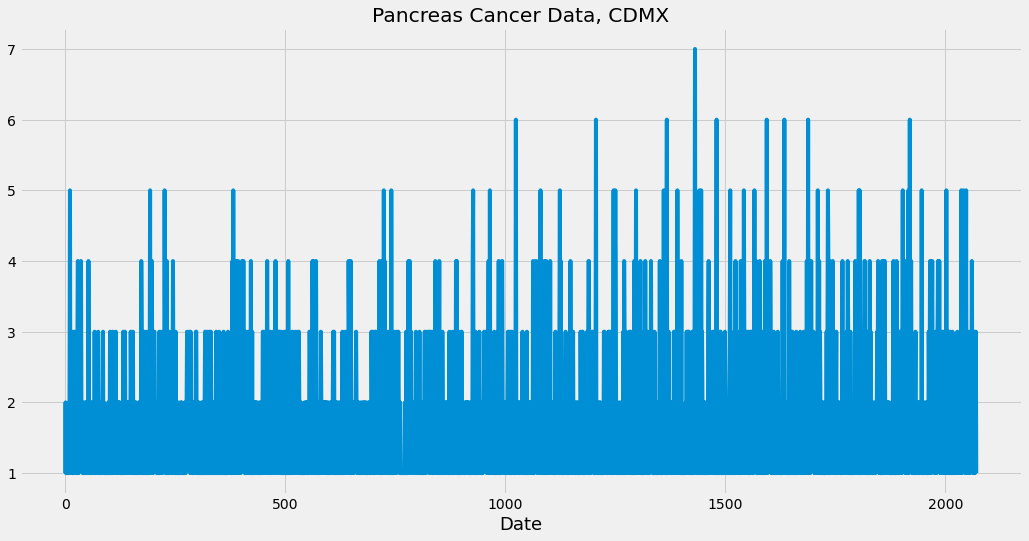

In [10]:
plt.figure(figsize=(16,8))
plt.title("Pancreas Cancer Data, CDMX")
plt.plot(df['counts'])
plt.xlabel('Date',fontsize=18)
plt.show()

In [11]:
data = df.filter(['counts'])
dataset = data.values
dataset = dataset.astype('float32')

In [12]:
dataset

array([[1.],
       [2.],
       [1.],
       ...,
       [2.],
       [3.],
       [1.]], dtype=float32)

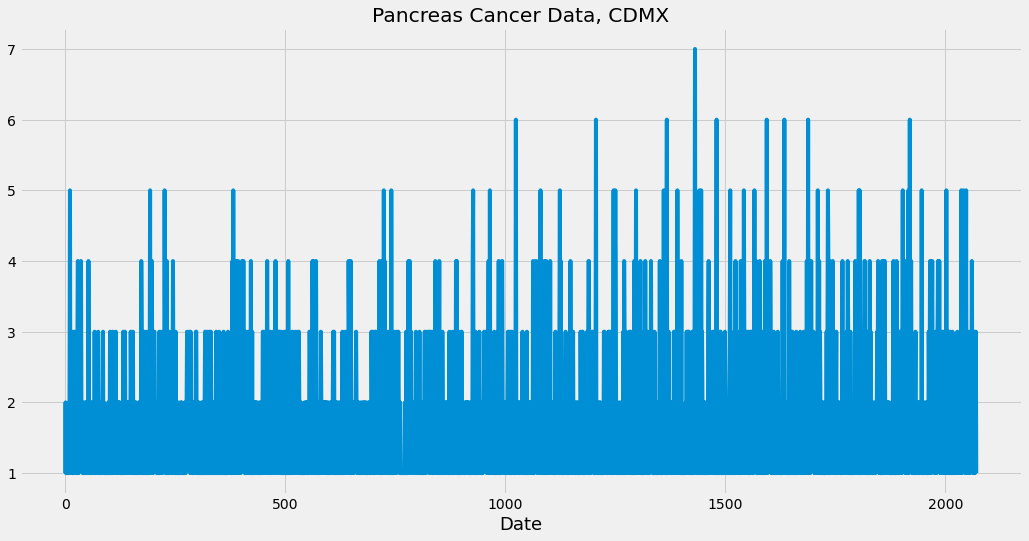

In [13]:
plt.figure(figsize=(16,8))
plt.title("Pancreas Cancer Data, CDMX")
plt.plot(dataset)
plt.xlabel('Date',fontsize=18)
plt.show()

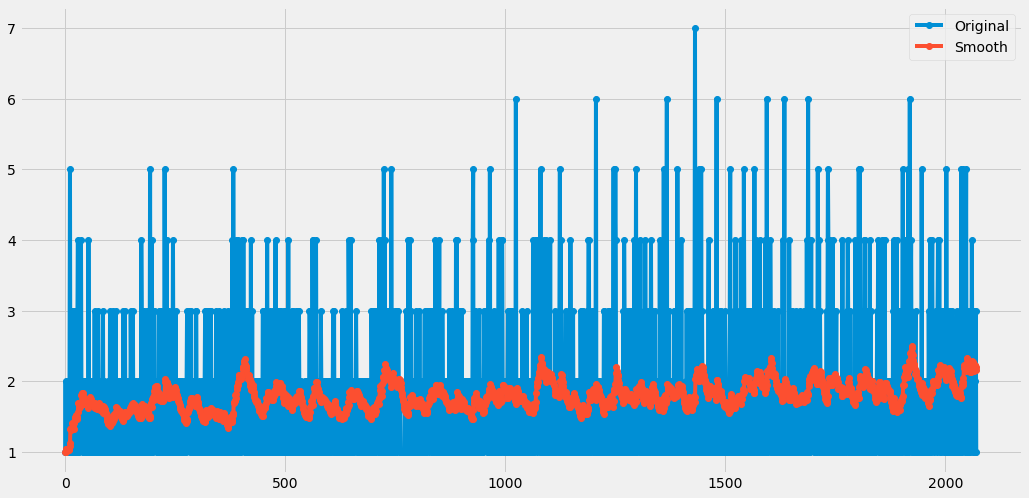

In [14]:
##smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(dataset).fit(smoothing_level=0.05,optimized=False)
plt.figure(figsize=(16,8))
plt.plot(dataset, marker='o')
plt.plot(fit1.fittedvalues, marker='o')
plt.legend(['Original', 'Smooth'])

In [15]:
df1 = pd.DataFrame(fit1.fittedvalues, columns= ['Fitted'])
df1.head()

,Fitted
0,1.000000
1,1.000000
2,1.050000
3,1.047500
4,1.045125


In [16]:
df1.shape

(2071, 1)

In [42]:
result = pd.concat([data, df1], axis=1, join="inner")
result.to_csv('fitted.csv')

In [43]:
dataset = df1.values

In [44]:
training_data_len = math.ceil(len(dataset)*.88)
training_data_len

2571

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [46]:
train_data = scaled_data[0:training_data_len,:]
look_backs = 70

x_train = []
y_train = []

for i in range(look_backs, len(train_data)):
    x_train.append(train_data[i-look_backs:i,0])
    y_train.append(train_data[i,0])
    if i<=look_backs+1:
        print(x_train)
        print(y_train)
        print()

[array([0.87873631, 0.87873631, 0.85536687, 0.80200665, 0.75131444,
       0.74210591, 0.66324948, 0.62728495, 0.62427789, 0.64479062,
       0.62532865, 0.6146296 , 0.58888586, 0.54884969, 0.51860515,
       0.5288219 , 0.51515836, 0.502178  , 0.48984667, 0.43918282,
       0.46895031, 0.47385999, 0.45515473, 0.4140153 , 0.38272266,
       0.40752334, 0.34539604, 0.31753436, 0.3144352 , 0.30370119,
       0.27792425, 0.26122598, 0.22199317, 0.24704052, 0.30199476,
       0.31525221, 0.30447734, 0.30203104, 0.29970705, 0.33644832,
       0.31682385, 0.29818059, 0.29604912, 0.30181404, 0.32287035,
       0.29613495, 0.27852615, 0.26958758, 0.27667558, 0.26003974,
       0.20528662, 0.18443041, 0.18798645, 0.16020544, 0.11823384,
       0.12509971, 0.10046303, 0.10042763, 0.10818381, 0.13113181,
       0.10619353, 0.10587159, 0.14451483, 0.12669721, 0.11756029,
       0.14782928, 0.13763576, 0.15132134, 0.16432265, 0.09877576])]
[0.028716394687109847]

[array([0.87873631, 0.87873631, 0.8

In [47]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2501, 70, 1)

# LSTM

In [48]:
model = Sequential() #initialize sequential model
model.add(LSTM(50,input_shape=(x_train.shape[1],1), return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(50, return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(25)) #LSTM layer with 32 neurons
model.add(Dense(1,activation='linear')) #Dense output layer with 1 neuron, linear activation

In [49]:
model = Sequential() #initialize sequential model
model.add(LSTM(64,input_shape=(x_train.shape[1],1), return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(32, return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(32)) #LSTM layer with 32 neurons
model.add(Dense(16,activation='relu')) #Dense layer with 16 neurons
model.add(Dense(8,activation='relu')) #Dense layer with 8 neurons
model.add(Dense(1,activation='linear')) #Dense output layer with 1 neuron, linear activation

In [50]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [51]:
history = model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
2501/2501 [==============================] - 63s 23ms/step - loss: 0.0074 - mae: 0.0642
Epoch 2/5
2501/2501 [==============================] - 58s 23ms/step - loss: 0.0017 - mae: 0.0327
Epoch 3/5
2501/2501 [==============================] - 58s 23ms/step - loss: 0.0015 - mae: 0.0307
Epoch 4/5
2501/2501 [==============================] - 59s 23ms/step - loss: 0.0015 - mae: 0.0309
Epoch 5/5
2501/2501 [==============================] - 59s 24ms/step - loss: 0.0013 - mae: 0.0288


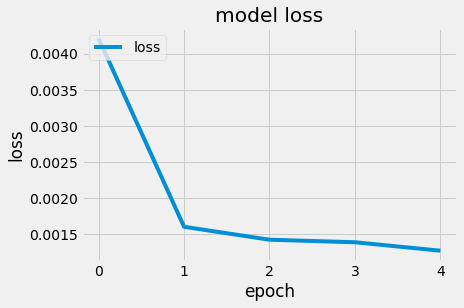

In [52]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# TRAIN

In [53]:
test_data = scaled_data[training_data_len - look_backs: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(look_backs, len(test_data)):
    x_test.append(test_data[i-look_backs:i, 0])

In [54]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [56]:
train = df1[:training_data_len]
valid = df1[training_data_len:]
valid['Predictions'] = predictions
valid

<ipython-input-56-f043aaa5b21f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Fitted,Predictions
2571,16.780761,16.452986
2572,16.991723,16.607721
2573,17.092137,16.843208
2574,16.937530,16.926046
2575,17.040654,16.728399
...,...,...
2916,15.976562,15.574653
2917,16.177734,15.931727
2918,16.118847,16.136997
2919,16.012905,16.028933


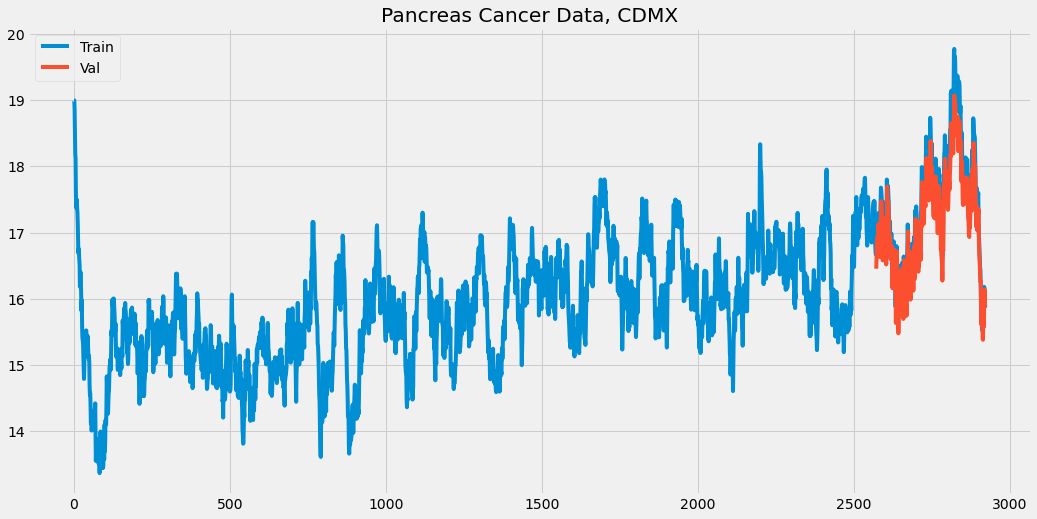

In [57]:
fig1 = plt.figure(figsize=(16,8))
plt.title("Pancreas Cancer Data, CDMX")
plt.plot(df1)
plt.plot(valid["Predictions"])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [58]:
filename = '\Fig2.png'
dirPath = dirname(os.getcwd())+"\ResultsLSTM" + filename
fig1.savefig(dirPath)